In [1]:
import json5
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

In [26]:
def json_to_csv(path_in, path_out):
    with open(path_in) as f:
        data = json5.load(f)
    data = pd.DataFrame(data)
    data.to_csv(path_out, index=False)

In [152]:
# json_to_csv('data/output.txt', 'data/data.csv')
# json_to_csv('data/output_3.txt', 'data/data_3.csv')

In [164]:
def data_preprocess(path, save_path):
    data = pd.read_csv(path)
    # interpreting as lists
    data[['comparisons', 'misc', 'copies']] = data[['comparisons', 'misc', 'copies']].applymap(eval)
    data[['misc', 'copies']] = data[['misc', 'copies']].applymap(lambda t: t[0])
    cmp = data['comparisons']
    data = data.assign(
        cmp_mean=cmp.apply(np.mean),
        cmp_std = cmp.apply(np.std)
    ).drop('comparisons', axis=1)
    data.to_csv(save_path, index=False)

In [165]:
data_preprocess('data/data.csv', 'data/data_prep.csv')
data_preprocess('data/data_3.csv', 'data/data_prep_3.csv')

In [166]:
data = pd.read_csv('data/data_prep.csv')
data_3 = pd.read_csv('data/data_prep_3.csv')

In [155]:
from scipy.optimize import curve_fit

def n_logn_mn_discr_half_freq(x, a, b, c):
    return a*np.ceil(np.log2(x)/2)*x + b*x + c

def n_logn_mn_discr(x, a, b, c):
    return a*np.ceil(np.log2(x))*x + b*x + c

def n_logn_mn_continuous(x, a, b, c):
    return a*np.log2(x)*x + b*x + c

def linear(x, a, b):
    return a*x + b

def analyze(x, y, analyzer, names):
    fit_res = curve_fit(analyzer, x, y)
    coeffs = fit_res[0]
    print(*coeffs)
    ax = sns.lineplot(x=x, y=y, label='эксперимент')
    sns.lineplot(x=x, y=analyzer(x, *coeffs), ax=ax, label='аппроксимация')
    ax.set_title(names['title'])
    ax.set_xlabel(names['x'])
    ax.set_ylabel(names['y'])
    save_ax(ax, names['save'])
    return ax

def plot_pdf(n):
    k = n//2
    x = np.arange(k-10, k)
    y = scipy.special.binom(k + x - 1, x)*2/scipy.special.binom(2*k, k)
    ax = sns.lineplot(x=x + k, y=y)
    ax.grid(visible=True)
    ax.set_xlabel('Число сравнений')
    ax.set_ylabel('вероятность')
    ax.set_title(f'Рис. 1: сравнения при слиянии двух массивов суммарной длины {n}')
    return ax

def save_ax(ax, name):
    ax.get_figure().savefig(name)



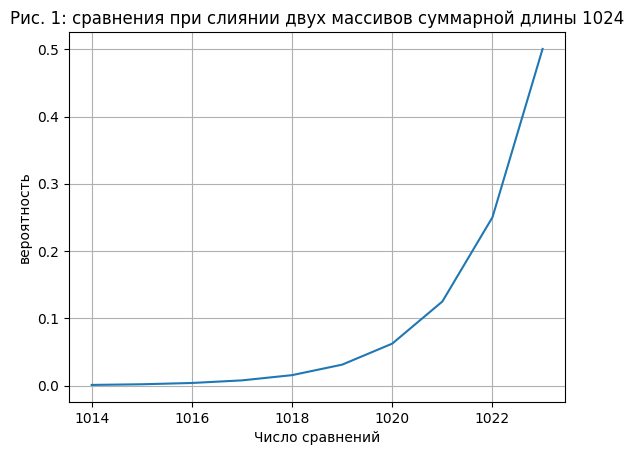

In [156]:
ax = plot_pdf(1024)
save_ax(ax, 'images/comparisons_proba.png')

0.7976744626778081 0.9363028033052696 -233.08752791419235


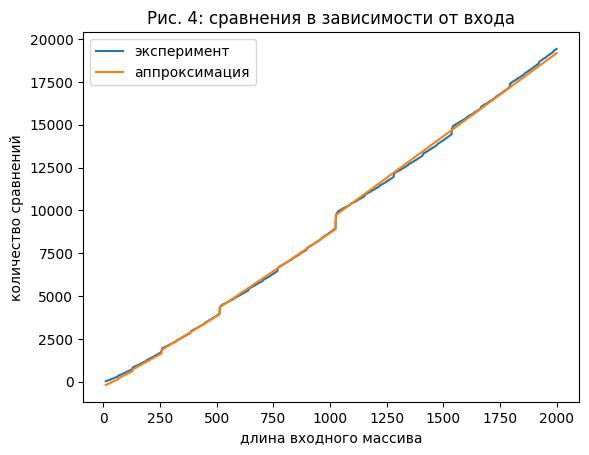

In [158]:
ax = analyze(data.length, data.cmp_mean, n_logn_mn_discr, {
    'title': 'Рис. 4: сравнения в зависимости от входа',
    'x': 'длина входного массива',
    'y': 'количество сравнений',
    'save': 'images/comp.png',
})

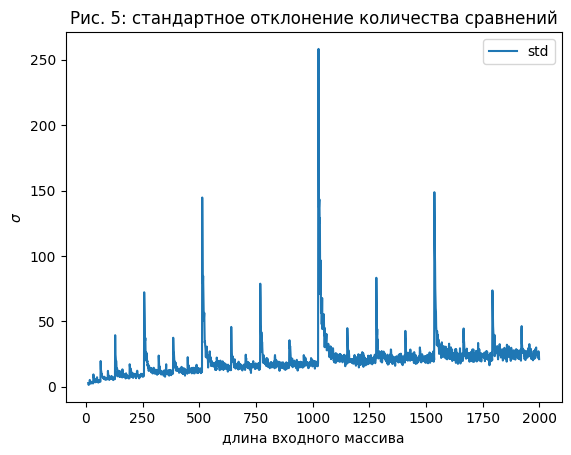

In [146]:
ax = sns.lineplot(x=data.length, y=data.cmp_std, label='std')

ax.set_title('Рис. 5: стандартное отклонение количества сравнений')
ax.set_ylabel(r'$\sigma$')
ax.set_xlabel('длина входного массива')
save_ax(ax, 'images/std.png')

0.973439713225913 -0.9130560334960496 -4233.78853655662


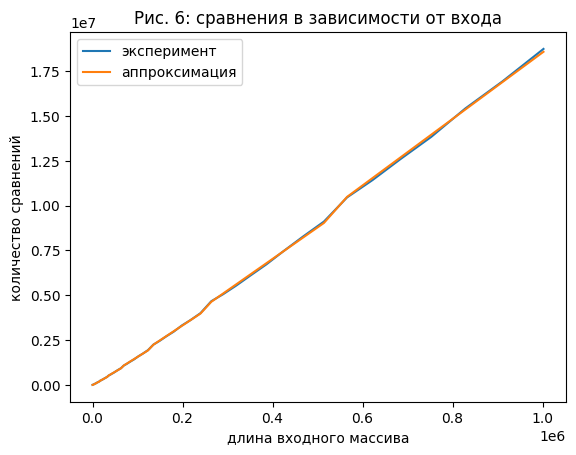

In [159]:
ax = analyze(data_3.length, data_3.cmp_mean, n_logn_mn_discr, {
    'title': 'Рис. 6: сравнения в зависимости от входа',
    'x': 'длина входного массива',
    'y': 'количество сравнений',
    'save': 'images/comp.png',
})

1.1281669912489185 -0.0538165036148015 -63.718372248451914


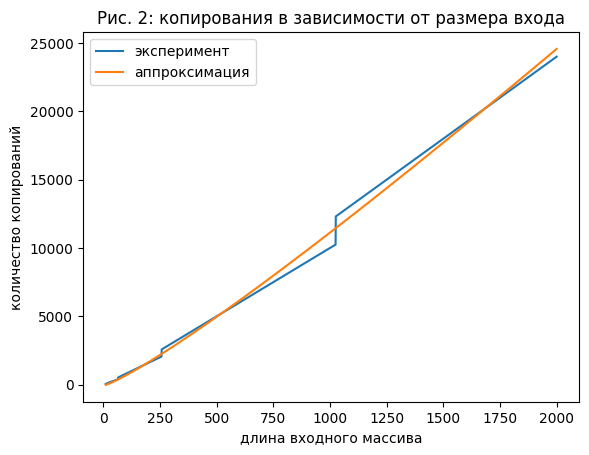

In [118]:
ax = analyze(data.length, data.copies, n_logn_mn_continuous, {
    'title': 'Рис. 2: копирования в зависимости от размера входа',
    'x': 'длина входного массива',
    'y': 'количество копирований',
    'save': 'images/copies_continuous.png',
})

/media/photon/AZ/my_files/_2022/books_2022/SDA/ML/env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


2.000000000000372 -2.1873614031164834e-12 -1.2290168882600483e-12


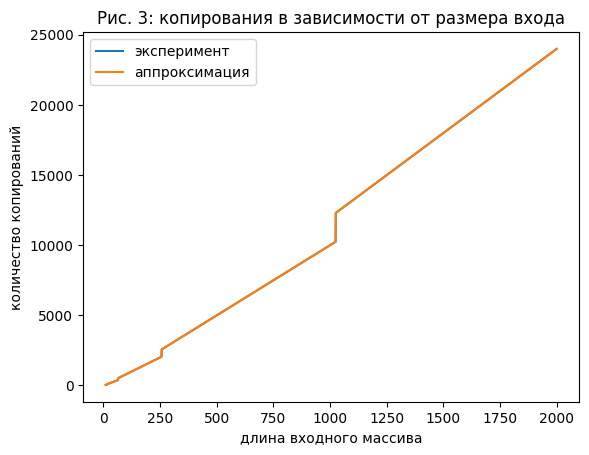

In [117]:
ax = analyze(data.length, data.copies, n_logn_mn_discr_half_freq, {
    'title': 'Рис. 3: копирования в зависимости от размера входа',
    'x': 'длина входного массива',
    'y': 'количество копирований',
    'save': 'images/copies_good.png',
})

1.0006231327390271 2.936374721441732


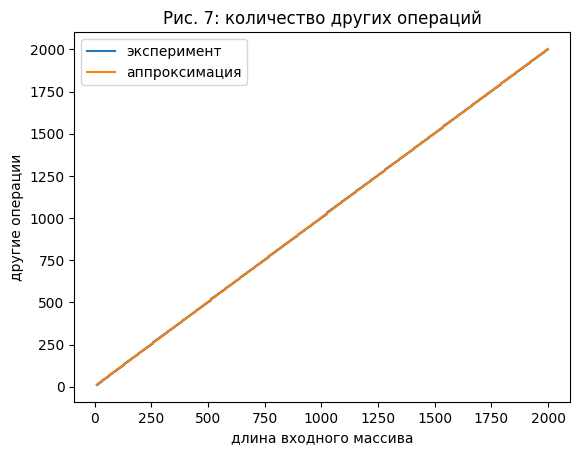

In [160]:
ax = analyze(data.length, data.misc, linear, {
    'title': 'Рис. 7: количество других операций',
    'x': 'длина входного массива',
    'y': 'другие операции',
    'save': 'images/misc.png',
})